In [50]:
import pandas as pd
import numpy as np
import pickle

# hypothesis: DAO activity difference for near v.s. non-near DAOs

In [8]:
df.columns

Index(['status', 'proposer', 'target', 'description', 'kind__type',
       'kind__bond', 'kind__purpose', 'kind__amount', 'vote_period_end',
       'vote_yes', 'vote_no', 'votes__talk2ricardo.near',
       'votes__monikablockdiver.near', 'votes__reginanogueira.near',
       'votes__nate.near', 'votes__carolin.near', 'votes__mariamneu.near',
       'votes__sparrow.near', 'votes__chloethedev.near', 'votes__len.near',
       'votes__createbase.near'],
      dtype='object')

In [14]:
fdir = 'data/'
fname = 'Sputnik DAO Proposals.xlsx'
df_dao_proposals = pd.read_excel(fdir+fname,sheet_name=None)
df_grants={'dao':[],'grants':[],'total_proposal':[],'total_success_proposal':[],'first_prop_time':[],'last_prop_time':[]}
for daoname in df_dao_proposals.keys():
    if daoname=='WORKSPACE': # this is not a dao, so skip it
        continue
    df = df_dao_proposals[daoname]
    df.columns = df.columns.str.replace(' ', '_').str.lower() # clean column names to avoid pandas key error
    if 'amount_(near)' in df.keys():
        # note: some numbers are just "x" so we have to skip them
        # only including proposals that succeeded
        totalfund = pd.to_numeric(df['amount_(near)'].loc[df['status']=='Success'],errors = 'coerce').sum(skipna=True)
    else:
        
        totalfund = (pd.to_numeric(df['kind__amount'].loc[df['status']=='Success'],errors = 'coerce')/(10**24)).sum(skipna=True)
    df_grants['dao'].append(daoname)
    df_grants['grants'].append(totalfund)
    df_grants['total_proposal'].append(len(df))
    df_grants['total_success_proposal'].append(sum(df['status']=='Success'))
    df_grants['first_prop_time'].append(np.min(df['vote_period_end']))
    df_grants['last_prop_time'].append(np.max(df['vote_period_end']))
df_grants = pd.DataFrame(df_grants).sort_values(by='grants')
df_grants

,dao,grants,total_proposal,total_success_proposal,first_prop_time,last_prop_time
12,Grants,1700.000000,5,1,1.616817e+18,1.621880e+18
11,Bounties,4986.000000,8,6,1.630957e+18,1.634140e+18
8,Genesis,5928.000000,45,15,1.610937e+18,1.625782e+18
10,NxM,7386.751634,106,85,1.617318e+18,1.637067e+18
2,Marketing Vertical,20724.000000,71,35,1.630059e+18,1.637152e+18
7,Assembly Script,23710.000000,21,14,1.614981e+18,1.635934e+18
6,Degens,28500.000000,97,93,1.631160e+18,1.634894e+18
4,Open Web Sandbox,64513.170000,455,388,1.621618e+18,1.636762e+18
13,Createbase,66794.653779,491,377,1.613753e+18,1.637698e+18
1,Creatives,82502.020000,82,69,1.624170e+18,1.638386e+18


## activity quantification 1: total funding distributed

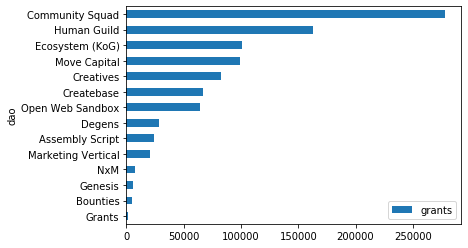

In [7]:
df_grants.plot.barh(x='dao',y='grants',)

## activity quantification 2: total proposals & success proposals

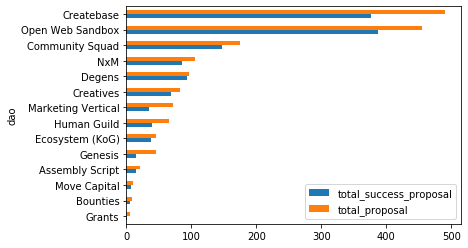

In [12]:
df_grants.sort_values(by='total_proposal').plot.barh(x='dao',y={'total_proposal','total_success_proposal'},)

## activity quantification 3: activity frequency

Defined as the time of first proposal to last proposal divided by total proposals happened

In [45]:
prop_daydelta=pd.to_timedelta(pd.to_datetime(df_grants['last_prop_time'])-pd.to_datetime(df_grants['first_prop_time']))/ np.timedelta64(1, 'D')
df_grants['proposal_freq'] = df_grants['total_proposal']/prop_daydelta

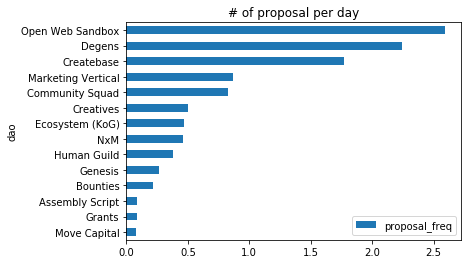

In [48]:
df_grants.sort_values(by='proposal_freq').plot.barh(x='dao',y='proposal_freq',title='# of proposal per day')

In [53]:
pickle.dump(df_grants,open('dao_prop_stats','wb'))